In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 


# Is Fandango Still Inflating Ratings?

In [ ]:
In October 2015, Walt Hickey from FiveThirtyEight published a popular article where he
presented strong evidence that suggests that Fandango's movie rating system was biased
and dishonest. In this project, we'll analyze more recent movie ratings data to determine
whether there has been any change in Fandango's rating system following Hickey's
analysis.

In [4]:
previous_data=pd.read_csv("fandango_score_comparison.csv")
previous_data

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0


In [3]:
after_data=pd.read_csv("movie_ratings_16_17.csv")
after_data 

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.60,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.20,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.10,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.70,2.40,1.15,1.05,1.5,2.5,1.0,1.0


In [5]:
previous_data.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [6]:
after_data.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


In [7]:
previous = previous_data[['FILM', 'Fandango_Stars',
'Fandango_Ratingvalue', 'Fandango_votes',
 'Fandango_Difference']].copy()
after = after_data[['movie', 'year', 'fandango']].copy()

In [8]:
previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [9]:
after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [ ]:
Our goal is to determine whether there has been any change in Fandango's rating system
following Hickey's analysis. The population of interest for our analysis comprises all the
movie ratings stored on Fandango's website, regardless of the releasing year.
Because we want to determine if the parameters of this population changed after Hickey's
analysis, we're interested in sampling the population at two different periods in time —
before and after Hickey's analysis — so we can compare the two states.
The data we're working with was sampled at the moments we want: one sample was taken
prior to the analysis, and the other was taken after the analysis. We want to describe the
population, so we need to make sure that the samples are representative; otherwise, we
should expect a large sampling error and, ultimately, inaccurate conclusions.
From Hickey's article and from the README.md of the data set's repository, we can see
that he used the following sampling criteria:
• The movie must have had at least 30 fan ratings on Fandango's website at the time
of sampling (Aug. 24, 2015).
• The movie must have had tickets on sale in 2015.
The sampling was clearly not random because not every movie had the same chance to be
included in the sample — some movies didn't have a chance at all (like those having under
30 fan ratings or those without tickets on sale in 2015). It's questionable whether this
sample is representative of the entire population we're interested in describing. It seems
more likely that it isn't, mostly because this sample is subject to temporal trends (e.g.,
movies in 2015 might have been outstandingly good or bad compared to other years).

In [ ]:
The sampling conditions for our other sample were the following (as it can be read in the
README.md of the data set's repository):
• The movie must have been released in 2016 or later.
• The movie must have had a considerable number of votes and reviews (it's unclear
how many from the README.md or from the data).
This second sample is also subject to temporal trends, and it's unlikely to be representative
of our population of interest.
Both these authors had certain research questions in mind when they sampled the data,
and they used a set of criteria to get a sample that would fit their questions. Their sampling
method is called purposive sampling (or judgmental/selective/subjective sampling). While
these samples were good enough for their research, they don't seem too useful for us.

In [ ]:
Changing the Goal of our Analysis
At this point, we can either collect new data or change our the goal of our analysis. We
choose the latter and place some limitations on our initial goal.
Instead of trying to determine whether there has been any change in Fandango's rating
system following Hickey's analysis, our new goal is to determine whether there's any
difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings
for popular movies in 2016. This new goal should also be a fairly good proxy for our initial
goal.

In [ ]:
Isolating the Samples We Need
With this new research goal, we have two populations of interest:
• All Fandango's ratings for popular movies released in 2015.
• All Fandango's ratings for popular movies released in 2016.
We need to be clear about what counts as popular movies. We'll use Hickey's benchmark of
30 fan ratings and count a movie as popular only if it has 30 fan ratings or more on
Fandango's website.
Although one of the sampling criteria in our second sample is movie popularity, the sample
doesn't provide information about the number of fan ratings. We should be skeptical once
more and ask whether this sample is truly representative and contains popular movies
(movies with over 30 fan ratings).
One quick way to check the representativity of this sample is to randomly sample 10
movies from it and then check the number of fan ratings ourselves on Fandango's website.
Ideally, at least 8 out of the 10 movies have 30 fan ratings or more.

In [10]:
after.sample(10, random_state = 1)


,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [ ]:
As of April 2018, these are the fan ratings we found:
Movie Fan ratings
Mechanic: Resurrection 2247
Warcraft 7271
Max Steel 493
Me Before You 5263
Fantastic Beasts and Where to Find
Them
13400
Cell 17
Genius 127
Sully 11877
A Hologram for the King 500
Captain America: Civil War 35057

In [ ]:
90% of the movies in our sample are popular. This is enough for us to move forward with a
bit more confidence.
Let's also double-check the other dataset for popular movies. The documentation states
clearly that there are only movies with at least 30 fan ratings, but it should take only a
couple of seconds to double-check here.

In [11]:
sum(previous['Fandango_votes'] < 30)

0

In [ ]:
If you explore the two datasets, you'll notice that there are movies with a release year
different than 2015 or 2016. For our purposes, we'll need to isolate only the movies
released in 2015 and 2016.
Let's start with Hickey's dataset and isolate only the movies released in 2015. There's no
special column for the releasing year, but we should be able to extract it from the strings in
the FILM column.

In [12]:
previous.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [14]:
previous['Year'] = previous['FILM'].str[-5:-1]
previous.head(2)


,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


In [15]:
previous['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [16]:
fandango_2015 = previous[previous['Year'] =='2015'].copy()
fandango_2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [18]:
after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


In [19]:
after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [20]:
fandango_2016 =after[after['year'] == 2016].copy()
fandango_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

In [ ]:
Comparing Distribution Shapes for 2015 and 2016
Our goal is to determine whether or not there is any difference between Fandango's ratings
for popular movies in 2015 and Fandango's ratings for popular movies in 2016. One way to
do this is to analyze and compare the distributions of movie ratings for the two samples.
We'll start with comparing the shape of the two distributions using kernel density plots.
We'll use the FiveThirtyEight style for the plots.

In [21]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

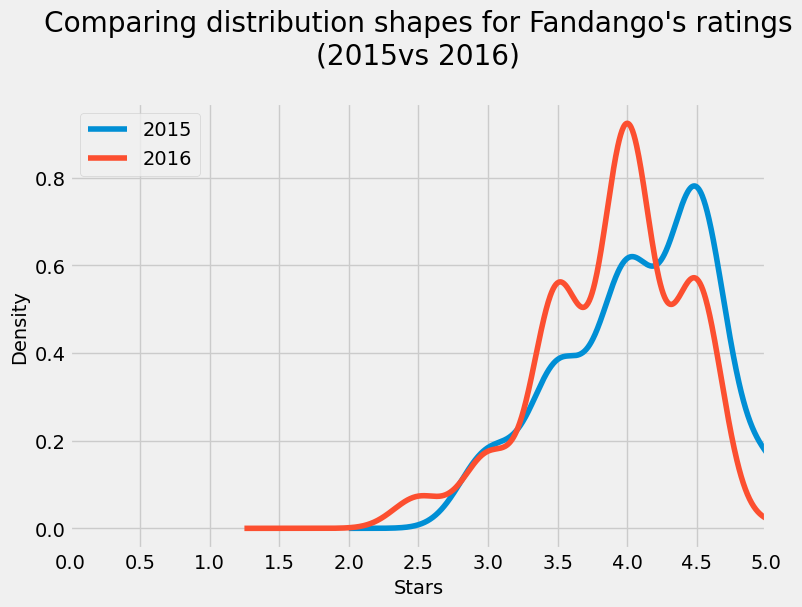

In [25]:
fandango_2015['Fandango_Stars'].plot.kde(label = '2015', legend =
True, figsize = (8,5.5))
fandango_2016['fandango'].plot.kde(label = '2016', legend = True)
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015vs 2016)",
 y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [ ]:
Two aspects are interesting in the figure above:
• Both distributions are strongly left-skewed.
• The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.
The left skew suggests that movies on Fandango are given mostly high and very high fan
ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious.
It'd be really interesting to investigate this further — ideally in a separate project, since
this is irrelevant for the current goal of our analysis.
The slight left shift of the 2016 distribution is very interesting for our analysis. It shows
that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a
difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's
ratings for popular movies in 2016. We can also see the direction of the difference: the
ratings in 2016 were slightly lower compared to 2015.

In [ ]:
Comparing Relative Frequencies
It seems we're following a good thread so far, but we need to analyze more granular
information. Let's examine the frequency tables of the two distributions to analyze some
numbers. Because the datasets have different numbers of movies, we normalize the tables
and show percentages instead

In [26]:
fandango_2015['Fandango_Stars'].value_counts(normalize =
True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [28]:
fandango_2016['fandango'].value_counts(normalize = True).sort_index()* 100


2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

In [ ]:
In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared
to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015
when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 —
there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.
The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015.
There clearly is a difference between the two frequency distributions.
For some other ratings, the percentage went up in 2016. There was a greater percentage of
movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high
ratings, and this challenges the direction of the change we saw on the kernel density plots.

In [ ]:
Determining the Direction of the Change
Let's take a couple of summary metrics for more precise information about the direction of
the change. In what follows, we'll compute the mean, the median, and the mode for both
distributions, and then we'll use a bar graph to plot the values.

In [29]:
mean_2015 = fandango_2015['Fandango_Stars'].mean()
mean_2016 = fandango_2016['fandango'].mean()

In [30]:
median_2015 = fandango_2015['Fandango_Stars'].median()
median_2016 = fandango_2016['fandango'].median()

In [32]:
mode_2015 = fandango_2015['Fandango_Stars'].mode()[0] # the output of
#Series.mode() is a bit uncommon
mode_2016 = fandango_2016['fandango'].mode()[0]


In [33]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


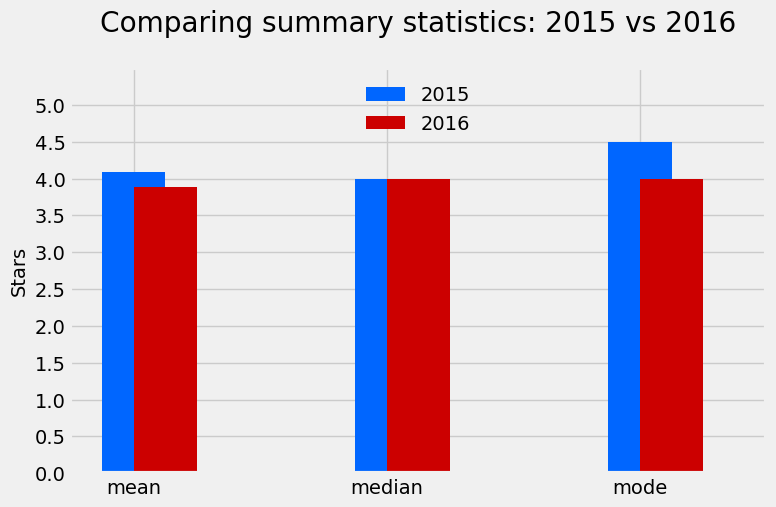

In [34]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label =
'2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label =
'2016', width = .25,
 rot = 0, figsize = (8,5))
plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [ ]:
Conclusion:
    
Based on the analysis, we can conclude that there is a difference in Fandango's movie
rating system between 2015 and 2016, but we can't say for sure whether this difference is
due to Fandango fixing the biased rating system or not. The ratings in 2016 were lower on
average compared to the ratings in 2015, which may indicate that Fandango made some
changes to its rating system after the 2015 FiveThirtyEight analysis. However, the
difference could also be attributed to other factors such as the quality of the movies that
were rated in the two different years.